In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from utils import *
import os

ModuleNotFoundError: No module named 'tifffile'

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


# Comparisons of distance means

In [130]:
directory = 'statistics'
name = '*.csv'

data, groups = find_csv_directories(directory, name)

In [131]:
# open each csv file in data as numpy array
for d in data:
    for i, f in enumerate(d):
        d[i] = np.mean(np.genfromtxt(f, delimiter=','), axis=0)

In [132]:
# from each array, take randomely only 16 samples
sampled = []
for d in data:
    sampled.append(np.random.choice(d, 16, replace=False))

In [133]:
# # convert data to pandas dataframe with columns names poi, pos, neg, random
df = pd.DataFrame(np.array(sampled))
df = df.T
df.columns = groups
df

,poi_laminb,negative_ctrl,positive_ctrl,poi_laminac
0,3.662109,2.014901,0.764715,1.903890
1,2.727935,1.631284,0.610235,2.657369
2,2.124270,2.780110,0.534277,2.319844
3,1.976306,4.428962,2.755372,0.744888
4,1.800760,3.183033,1.338249,0.731486
5,1.093914,2.418446,1.414913,2.158461
6,1.656078,3.267291,1.045379,1.841763
7,1.974413,1.857904,0.399968,2.952679
8,1.469557,4.689883,0.792748,1.327762
9,2.888312,3.936165,0.608399,2.709568


In [134]:
# save new csv with only means
df.to_csv('statistics/distance_means_statistics.csv')

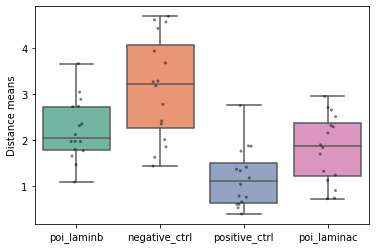

In [135]:
# create a boxplot of the data include each data point as a dot
sns.boxplot(data=df, palette=("Set2"))
sns.stripplot(data=df, color='black', size=3, alpha=0.5)
# set y-axis label
plt.ylabel('Distance means')
plt.savefig('Distance_means.png')
plt.show()

### One-way ANOVA

In [136]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['poi_laminb'], df['positive_ctrl'], df['negative_ctrl'], df['poi_laminac'])
print(f'f-value is {fvalue}, p_value is {pvalue}')

f-value is 16.239903139327968, p_value is 7.687048715087841e-08


### Multiple comparisons

In [137]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# reorganize dataframe to be only one column with a group specified in group_column

values = []
group = []

for (d, g) in zip(data, groups):
    values.extend(d)
    group.extend(np.repeat(g, len(d)))

df = pd.DataFrame({'values': values, 'group': group})

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['values'], groups=df['group'], alpha=0.05)
print(m_comp)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
negative_ctrl   poi_laminac  -1.3054  0.001 -1.8947 -0.7161   True
negative_ctrl    poi_laminb  -1.0353  0.001 -1.6246 -0.4459   True
negative_ctrl positive_ctrl  -1.9472  0.001 -2.6345   -1.26   True
  poi_laminac    poi_laminb   0.2702 0.4438 -0.2013  0.7416  False
  poi_laminac positive_ctrl  -0.6418 0.0272 -1.2311 -0.0525   True
   poi_laminb positive_ctrl   -0.912  0.001 -1.5013 -0.3226   True
------------------------------------------------------------------


## 75th% percentile

In [138]:
directory = 'statistics'
name = '*.csv'

data, groups = find_csv_directories(directory, name)

# open each csv file in data as numpy array
for d in data:
    for i, f in enumerate(d):
        d[i] = np.percentile(np.genfromtxt(f, delimiter=','), 75,  axis=0)

# from each array, take randomely only 16 samples
sampled = []
for d in data:
    sampled.append(np.random.choice(d, 16, replace=False))
# # convert data to pandas dataframe with columns names poi, pos, neg, random
df = pd.DataFrame(np.array(sampled))
df = df.T
df.columns = groups
df

,poi_laminb,negative_ctrl,positive_ctrl,poi_laminac
0,3.337364,4.771142,0.771751,3.678614
1,3.760814,2.279890,1.807761,2.493512
2,3.297635,6.683412,3.037037,3.637032
3,2.132487,2.768465,2.784601,5.886085
4,3.228932,3.524472,0.721388,2.651490
5,6.548756,7.444139,4.781010,2.218468
6,5.011427,6.722916,0.260000,1.650604
7,1.816040,3.737900,0.300000,3.564183
8,4.140193,2.663025,1.050524,1.100000
9,4.526146,7.425624,0.460000,2.560937


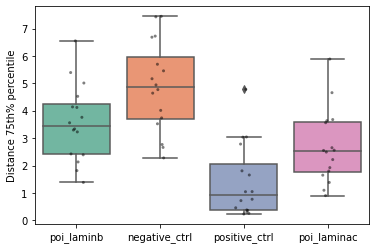

In [139]:
# create a boxplot of the data include each data point as a dot
sns.boxplot(data=df, palette=("Set2"))
sns.stripplot(data=df, color='black', size=3, alpha=0.5)
# set y-axis label
plt.ylabel('Distance 75th% percentile')
plt.savefig('Distance_percentile.png')
plt.show()

### One-way ANOVA

In [140]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['poi_laminb'], df['positive_ctrl'], df['negative_ctrl'], df['poi_laminac'])
print(f'f-value is {fvalue}, p_value is {pvalue}')

f-value is 16.50758081328351, p_value is 6.1901108620352e-08


### Multiple comparisons

In [141]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# reorganize dataframe to be only one column with a group specified in group_column

values = []
group = []

for (d, g) in zip(data, groups):
    values.extend(d)
    group.extend(np.repeat(g, len(d)))

df = pd.DataFrame({'values': values, 'group': group})

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['values'], groups=df['group'], alpha=0.05)
print(m_comp)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
negative_ctrl   poi_laminac  -2.1483  0.001 -3.1915  -1.105   True
negative_ctrl    poi_laminb  -1.6746  0.001 -2.7179 -0.6314   True
negative_ctrl positive_ctrl  -3.4526  0.001 -4.6692  -2.236   True
  poi_laminac    poi_laminb   0.4737 0.4524 -0.3609  1.3082  False
  poi_laminac positive_ctrl  -1.3043  0.008 -2.3476 -0.2611   True
   poi_laminb positive_ctrl   -1.778  0.001 -2.8212 -0.7347   True
------------------------------------------------------------------


## Percentage below 0.5 micrometers

In [142]:
directory = 'statistics'
name = '*.csv'

data, groups = find_csv_directories(directory, name)

# open each csv file in data as numpy array
for d in data:
    for i, f in enumerate(d):
        arr = np.genfromtxt(f, delimiter=',')
        # compute percent of data folling below some value in arr
        d[i] = np.sum(arr < 0.5) / len(arr)
        
# from each array, take randomely only 16 samples
sampled = []
for d in data:
    sampled.append(np.random.choice(d, 16, replace=False))
# # convert data to pandas dataframe with columns names poi, pos, neg, random
df = pd.DataFrame(np.array(sampled))
df = df.T
df.columns = groups
df

,poi_laminb,negative_ctrl,positive_ctrl,poi_laminac
0,0.377140,0.190089,0.628158,0.276836
1,0.232452,0.042066,0.770862,0.215146
2,0.461290,0.562551,0.789367,0.557704
3,0.200201,0.332280,0.453770,0.235475
4,0.314833,0.266863,0.664387,0.571429
5,0.364700,0.411492,0.868004,0.530007
6,0.463196,0.350027,0.519929,0.260399
7,0.389967,0.037555,0.467753,0.278102
8,0.583981,0.107013,0.518865,0.239724
9,0.462170,0.078753,0.802189,0.425638


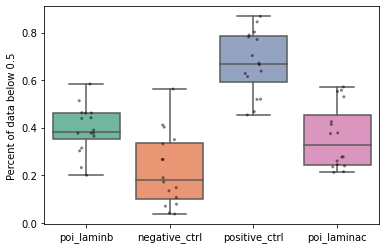

In [143]:
# create a boxplot of the data include each data point as a dot
sns.boxplot(data=df, palette=("Set2"))
sns.stripplot(data=df, color='black', size=3, alpha=0.5)
# set y-axis label
plt.ylabel('Percent of data below 0.5')
plt.savefig('Distance_percent_below_0.5.png')
plt.show()

### One-way ANOVA

In [144]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['poi_laminb'], df['positive_ctrl'], df['negative_ctrl'], df['poi_laminac'])
print(f'f-value is {fvalue}, p_value is {pvalue}')

f-value is 32.62743357134904, p_value is 1.2340629906338222e-12


### Multiple comparisons test

In [145]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# reorganize dataframe to be only one column with a group specified in group_column

values = []
group = []

for (d, g) in zip(data, groups):
    values.extend(d)
    group.extend(np.repeat(g, len(d)))

df = pd.DataFrame({'values': values, 'group': group})

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['values'], groups=df['group'], alpha=0.05)
print(m_comp)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
negative_ctrl   poi_laminac   0.1505  0.001  0.0507 0.2503   True
negative_ctrl    poi_laminb   0.1397 0.0023  0.0399 0.2395   True
negative_ctrl positive_ctrl   0.4477  0.001  0.3313 0.5641   True
  poi_laminac    poi_laminb  -0.0108    0.9 -0.0906 0.0691  False
  poi_laminac positive_ctrl   0.2972  0.001  0.1974  0.397   True
   poi_laminb positive_ctrl    0.308  0.001  0.2082 0.4078   True
-----------------------------------------------------------------


# Pearson's correlation coefficients (Confocal channels)

In [2]:
directory = 'statistics'
name = 'pcc.txt'

data, groups = find_csv_directories(directory, name)

In [3]:
key = 'confocal'

pccs_data = read_txt(data, key)

In [11]:
# sample data
print(groups)
# index = groups.index('poi')
# show each group sample 16 random samples
sampled = []
for d in pccs_data:
    sampled.append(np.random.choice(d, 16, replace=False))

# pccs_data[index] = np.random.choice(pccs_data[0], 16, replace=False)

# convert data to pandas dataframe with columns names poi, pos, neg, random
df = pd.DataFrame(np.array(sampled))
df = df.T
df.columns = groups
df

['poi_laminb', 'negative_ctrl', 'positive_ctrl', 'poi_laminac']


,poi_laminb,negative_ctrl,positive_ctrl,poi_laminac
0,0.2633,0.3749,0.9150,0.6398
1,0.6537,0.3044,0.8890,0.4824
2,0.5683,0.1416,0.8491,0.3090
3,0.5891,0.0761,0.8919,0.3025
4,0.3945,0.1807,0.8852,0.6896
5,0.6609,0.2092,0.8468,0.5826
6,0.3608,0.3180,0.8807,0.3025
7,0.4667,0.3446,0.8379,0.5324
8,0.4671,0.2425,0.8478,0.7041
9,0.5644,0.3123,0.9117,0.5874


In [12]:
# save new csv with only means
df.to_csv('statistics/pccs_sampled_confocal.csv')

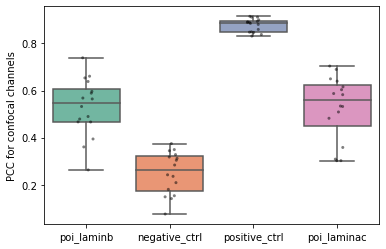

In [13]:
 # plot boxplot of pccs with labels poi, pos, neg
sns.boxplot(data=df, palette=("Set2"))
sns.stripplot(data=df, color='black', size=3, alpha=0.5)
plt.ylabel('PCC for confocal channels')
plt.savefig('PCC_for_confocal_channels.png')
plt.show()

### One-way ANOVA

In [15]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['poi_laminb'], df['positive_ctrl'], df['negative_ctrl'], df['poi_laminac'])
print(f'f-value is {fvalue}, p_value is {pvalue}')

f-value is 97.97016422051038, p_value is 4.3172091977611246e-23


### Multiple comparisons using Tukey's HSD test

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# reorganize dataframe to be only one column with a group specified in group_column

values = []
group = []

for (d, g) in zip(pccs_data, groups):
    values.extend(d)
    group.extend(np.repeat(g, len(d)))

df = pd.DataFrame({'values': values, 'group': group})

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['values'], groups=df['group'], alpha=0.05)
print(m_comp)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower  upper  reject
----------------------------------------------------------------
negative_ctrl   poi_laminac   0.2882 0.001  0.2027 0.3736   True
negative_ctrl    poi_laminb   0.2787 0.001   0.179 0.3784   True
negative_ctrl positive_ctrl   0.6272 0.001  0.5276 0.7269   True
  poi_laminac    poi_laminb  -0.0095   0.9 -0.0949  0.076  False
  poi_laminac positive_ctrl   0.3391 0.001  0.2536 0.4245   True
   poi_laminb positive_ctrl   0.3485 0.001  0.2488 0.4482   True
----------------------------------------------------------------


# Pearson's correlation coefficients (STED channels)

In [17]:
directory = 'statistics'
name = 'pcc.txt'

data, groups = find_csv_directories(directory, name)

In [18]:
key = 'STED'

pccs_data = read_txt(data, key)

In [19]:
# sample data
# index = groups.index('poi')
# pccs_data[index] = np.random.choice(pccs_data[0], 16, replace=False)

sampled = []
for d in pccs_data:
    sampled.append(np.random.choice(d, 16, replace=False))

# convert data to pandas dataframe with columns names poi, pos, neg, random
df = pd.DataFrame(np.array(sampled))
df = df.T
df.columns = groups
df

,poi_laminb,negative_ctrl,positive_ctrl,poi_laminac
0,0.1351,0.1718,0.6870,0.1190
1,0.2271,0.2613,0.5115,0.2229
2,0.1420,0.1493,0.7362,0.1122
3,0.1599,0.1893,0.5577,0.0906
4,0.1989,0.1312,0.6868,0.1643
5,0.0366,0.2302,0.6688,0.2049
6,0.1174,0.2863,0.5732,0.5742
7,0.2576,0.2018,0.6336,0.2660
8,0.2666,0.2913,0.6918,0.0906
9,0.1885,0.1699,0.6779,0.2707


In [20]:
# save new csv with only means
df.to_csv('statistics/pccs_sampled_STED.csv')

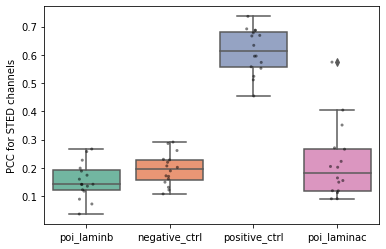

In [21]:
 # plot boxplot of pccs with labels poi, pos, neg
sns.boxplot(data=df, palette=("Set2"))
sns.stripplot(data=df, color='black', size=3, alpha=0.5)
plt.ylabel('PCC for STED channels')
plt.savefig('PCC_for_STED_channels.png')
plt.show()


### One-way ANOVA

In [23]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['poi_laminb'], df['positive_ctrl'], df['negative_ctrl'], df['poi_laminac'])
print(f'f-value is {fvalue}, p_value is {pvalue}')

f-value is 94.76095927367466, p_value is 9.848005675617049e-23


### Multiple comparisons using Tukey's HSD test

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# reorganize dataframe to be only one column with a group specified in group_column

values = []
group = []

for (d, g) in zip(pccs_data, groups):
    values.extend(d)
    group.extend(np.repeat(g, len(d)))

df = pd.DataFrame({'values': values, 'group': group})

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['values'], groups=df['group'], alpha=0.05)
print(m_comp)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
negative_ctrl   poi_laminac   0.0146    0.9 -0.0557  0.0849  False
negative_ctrl    poi_laminb  -0.0479 0.3006 -0.1191  0.0233  False
negative_ctrl positive_ctrl   0.4178  0.001  0.3348  0.5009   True
  poi_laminac    poi_laminb  -0.0625 0.0217 -0.1183 -0.0067   True
  poi_laminac positive_ctrl   0.4032  0.001  0.3329  0.4735   True
   poi_laminb positive_ctrl   0.4657  0.001  0.3945  0.5369   True
------------------------------------------------------------------
